EfficientNetV2


In [1]:
import os
import keras
!pip install keras-cv

import keras_cv
import numpy as np
import tensorflow_datasets as tfds
import matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 16.9 MB/s eta 0:00:00


In [2]:
dataset = tfds.load(
    "cats_vs_dogs", split="train", as_supervised=True, batch_size=128
)

# Resize images to a common size.
resize = keras_cv.layers.Resizing(224, 224, crop_to_aspect_ratio=True)
dataset = dataset.map(lambda x, y: (resize(x), y))

# Split off some valication data
validation_size = int(dataset.cardinality().numpy() * 0.1)
val_data = dataset.take(validation_size).shuffle(100)
train_data = dataset.skip(validation_size).shuffle(100)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.LP68OC_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [3]:
model = keras_cv.models.ImageClassifier.from_preset("efficientnetv2_b0_imagenet", num_classes=2,)
model.summary()

100%|██████████| 1.79k/1.79k [00:00<00:00, 1.88MB/s]


100%|██████████| 23.1M/23.1M [00:00<00:00, 30.8MB/s]


Model: "image_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficient_net_v2b0_backbone          │ (None, None, None, 1280)    │       5,919,312 │
│ (EfficientNetV2Backbone)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ avg_pool (GlobalAveragePooling2D)    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ predictions (Dense)                  │ (None, 2)                   │           2,562 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,921,874 (22.59 MB)

 Trainable params: 5,861,266 (22.36 MB)

 Non-trainable params: 60,608 (236.75 KB)

In [4]:
model.compile(loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(learning_rate=0.01), metrics=["accuracy"],)


In [5]:
model.fit(train_data, validation_data=val_data, epochs=5)

Epoch 1/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 318s 952ms/step - accuracy: 0.7376 - loss: 0.5743 - val_accuracy: 0.9293 - val_loss: 0.2937
Epoch 2/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 166s 545ms/step - accuracy: 0.9348 - loss: 0.2679 - val_accuracy: 0.9449 - val_loss: 0.1862
Epoch 3/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 199s 549ms/step - accuracy: 0.9461 - loss: 0.1820 - val_accuracy: 0.9540 - val_loss: 0.1396
Epoch 4/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 140s 544ms/step - accuracy: 0.9543 - loss: 0.1458 - val_accuracy: 0.9609 - val_loss: 0.1127
Epoch 5/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 140s 533ms/step - accuracy: 0.9609 - loss: 0.1214 - val_accuracy: 0.9661 - val_loss: 0.0958


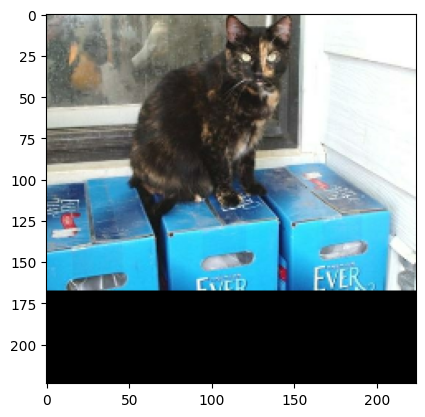

In [6]:
test_image, label = next(val_data.rebatch(1).as_numpy_iterator())
matplotlib.pyplot.imshow(test_image[0] / 255.)

In [7]:
model.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


array([[0.9098662 , 0.09013382]], dtype=float32)